In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix

In [2]:
X = pd.read_csv('Logistic_X_Train.csv')
y = pd.read_csv('Logistic_Y_Train.csv')
test = pd.read_csv('Logistic_X_Test.csv')

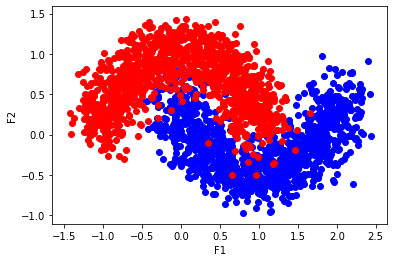

In [29]:
idx_1 = np.where(y.label==1)
idx_0 = np.where(y.label==0)
plt.scatter(X.iloc[idx_1].f1,X.iloc[idx_1].f2,c='b')
plt.scatter(X.iloc[idx_0].f1,X.iloc[idx_0].f2,c='r')
plt.xlabel('F1')
plt.ylabel('F2')
plt.show()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.8672222222222222
0.8733333333333333


In [30]:
def plot_normal_line(A, B, C, ax=None, **kwargs):
    """ Plot equation of Ax+By+C=0"""
    if ax is None:
        ax = plt.gca()
    if A == 0 and B == 0:
        raise Exception('A or B should be non-zero')
    if B == 0:
        # plot vertical
        ax.vlines(-C / A, *ax.get_ylim(), **kwargs)
    else:
        # plot functoon
        x = np.array(ax.get_xlim())
        y = (A*x+C) / -B
        ax.plot(x, y, **kwargs)

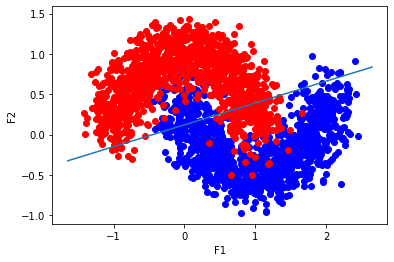

In [38]:
idx_1 = np.where(y.label==1)
idx_0 = np.where(y.label==0)
plt.scatter(X.iloc[idx_1].f1,X.iloc[idx_1].f2,c='b')
plt.scatter(X.iloc[idx_0].f1,X.iloc[idx_0].f2,c='r')
plot_normal_line(lr.coef_[0,0],lr.coef_[0,1],lr.intercept_)
plt.xlabel('F1')
plt.ylabel('F2')
plt.show()

In [44]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.2, random_state=42)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
import tensorflow as tf

In [79]:
model = Sequential()
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [80]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [81]:
model.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test))

Train on 1800 samples, validate on 450 samples
Epoch 1/30
1800/1800 [==============================] - 1s 556us/sample - loss: 0.6686 - acc: 0.5928 - val_loss: 0.6088 - val_acc: 0.7600
Epoch 2/30
1800/1800 [==============================] - 0s 153us/sample - loss: 0.5424 - acc: 0.7833 - val_loss: 0.4725 - val_acc: 0.8378
Epoch 3/30
1800/1800 [==============================] - 0s 130us/sample - loss: 0.4267 - acc: 0.8617 - val_loss: 0.3738 - val_acc: 0.8844
Epoch 4/30
1800/1800 [==============================] - 0s 126us/sample - loss: 0.3452 - acc: 0.8822 - val_loss: 0.3046 - val_acc: 0.9022
Epoch 5/30
1800/1800 [==============================] - 0s 148us/sample - loss: 0.2883 - acc: 0.8928 - val_loss: 0.2532 - val_acc: 0.9067
Epoch 6/30
1800/1800 [==============================] - 0s 125us/sample - loss: 0.2391 - acc: 0.9111 - val_loss: 0.2088 - val_acc: 0.9267
Epoch 7/30
1800/1800 [==============================] - 0s 131us/sample - loss: 0.1967 - acc: 0.9278 - val_loss: 0.1750 - val

In [82]:
test_X = np.array(test)

In [84]:
ans = model.predict(test_X)

In [97]:
ans = ans.reshape(-1)

In [98]:
final = pd.Series(ans)

In [100]:
for i in range(len(final)):
    final.iloc[i] = 1 if final.iloc[i]>0.5 else 0

In [101]:
final

0      0.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
745    0.0
746    1.0
747    0.0
748    0.0
749    0.0
Length: 750, dtype: float32

In [104]:
final.to_csv('Final ans')

In [105]:
y_pred = model.predict(X_test).reshape(-1)

In [107]:
for i in range(len(y_pred)):
    y_pred[i] = 1 if y_pred[i]>0.5 else 0

In [109]:
confusion_matrix(y_test,y_pred)

array([[221,   9],
       [  6, 214]])